#  EDA - Kyle Cloud

### My Features:

* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* MasVnrArea: Masonry veneer area in square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet

### Import pandas, numpy, and matplotlib.

In [80]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Load the house data.

In [81]:
df = pd.read_csv("train.csv")

### Extract my features. Store in new dataframe.

In [82]:
myDF = df[['LotFrontage',
           'LotArea',
           'MasVnrArea',
           'BsmtFinSF1',
           'BsmtFinSF2',
           'SalePrice']]

In [83]:
myFeatures = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']

### Determine the datatype of each variable.

In [84]:
myDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
MasVnrArea     1452 non-null float64
BsmtFinSF1     1460 non-null int64
BsmtFinSF2     1460 non-null int64
SalePrice      1460 non-null int64
dtypes: float64(2), int64(4)
memory usage: 68.6 KB


#### All of my features are numerical.

### Determine the size of the data.

In [85]:
print(myDF.shape)

(1460, 6)


In [86]:
myDF.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,755000.000000


### Separate dataframe into features and target variable.

In [87]:
features = myDF.drop('SalePrice', axis=1)
target = myDF.SalePrice

# Reduce Skewness for Numeric Features

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Here we are interested in the variables which have skewness more than 0.75


![](https://www.managedfuturesinvesting.com/images/default-source/default-album/skewness---mean-median-mode.jpg?sfvrsn=0)

### Visualize distribution of LotFrontage.

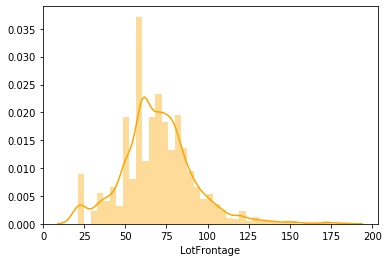

In [88]:
frontage = features['LotFrontage'][features['LotFrontage'] < 200][features['LotFrontage'].notna()]
sns.distplot(frontage,hist=True,color='orange')

#### LotFrontage has a negative skew.

### Square the data values to reduce the skew.

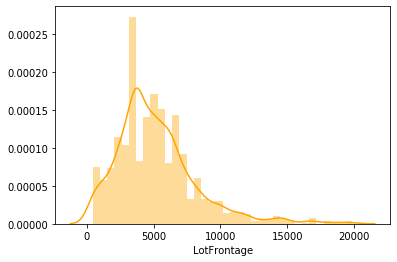

In [89]:
frontageSquared = frontage.apply(lambda x: x**2)
frontageSquared = frontageSquared[frontageSquared < 20000]
sns.distplot(frontageSquared,hist=True,color='orange')

### Visualize distribution of LotArea.

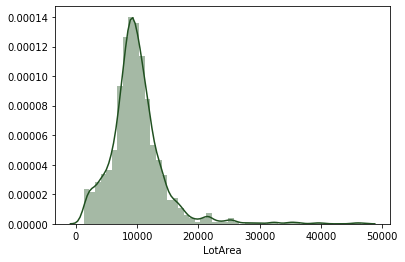

In [90]:
area = features['LotArea'][features['LotArea'] < 50000] # omit outliers
sns.distplot(area,hist=True,color='#205020')

#### LotArea has a slight positive skew.

### Use log to reduce the skew.

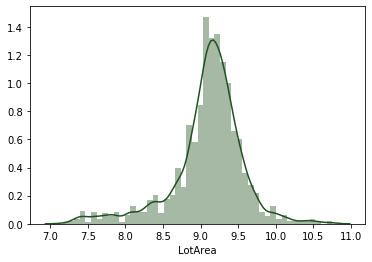

In [91]:
areaUnskewed = area.apply(lambda x: np.log(x))
sns.distplot(areaUnskewed,hist=True,color='#205020')

### Visualize distribution of MasVnrArea (masonry veneer area).

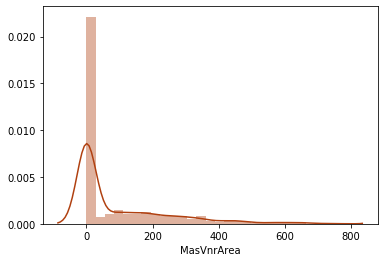

In [92]:
masonry = features['MasVnrArea'][features['MasVnrArea'].notna()][features['MasVnrArea'] < 750]
sns.distplot(masonry,hist=True,color='#b04010')

#### Most of the houses do not have any masonry veneer area.

### Visualize distribution of BsmtFinSF1 (Type 1 Finished Square Feet).

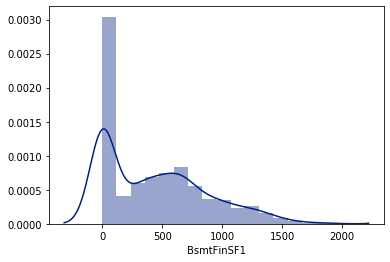

In [93]:
basement1 = features['BsmtFinSF1'][features['BsmtFinSF1'] < 2000]
sns.distplot(basement1,hist=True,color='#002080')

#### BsmtFinSF1 is positively skewed. The mode is 0.

### Let's look at only the houses that actually have Type 1 finish.

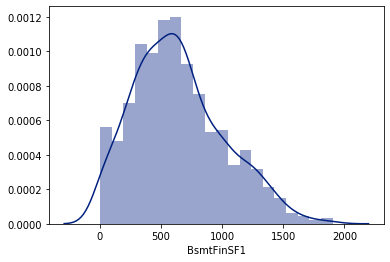

In [94]:
bsNo0 = basement1[basement1 > 0]
sns.distplot(bsNo0,hist=True,color='#002080')

#### The remaining data have a slight positive skew but is much more normally distributed.

### Visualize the distribution of BsmtFinSF2 (Type 2 Finished Square Feet).

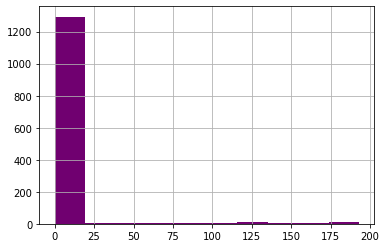

In [95]:
basement2 = features['BsmtFinSF2'][features['BsmtFinSF2'] < 200]
basement2.hist(bins=10, color='#700070');

#### A vast majority of the houses in the dataset do not have two separate types of basement finish. Should it be dropped?

/home/kyle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kyle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/kyle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


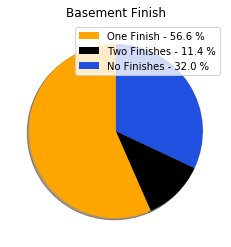

In [96]:
# Pie Plot:
labels = ('One Finish', 'Two Finishes', 'No Finishes')
BF1 = myDF[myDF['BsmtFinSF1'] > 0][myDF['BsmtFinSF2'] == 0].shape[0]
Both = myDF[myDF['BsmtFinSF2'] > 0][myDF['BsmtFinSF1'] > 0].shape[0]
Neither = myDF[myDF['BsmtFinSF2'] == 0][myDF['BsmtFinSF1'] == 0].shape[0]
bfSum = BF1 + Both + Neither
ratio1 = 100.*BF1/bfSum
ratioBoth = 100.*Both/bfSum
ratioNeither = 100.*Neither/bfSum
sizes = [BF1, Both, Neither]
percent = [ratio1, ratioBoth, ratioNeither]
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, percent)]

colors = ['orange', 'black', '#2050e0']
patches, texts= plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc='best')
plt.title("Basement Finish")
plt.show()

#### A majority of the houses in the sample has one type of basement finish. About a third has no basement or an unfinished basement. It is uncommon for a house to have two different types of basement finish, which explains why the 75th percentile of the BsmtFinSF2 feature is 0.

# Correlation:

Text(0.5, 1, 'Correlation between features')

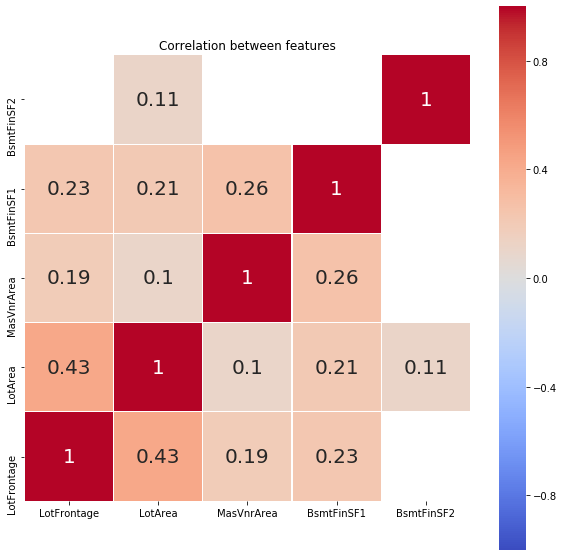

In [97]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=features.corr()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 20}, square=True);
ax.set_ylim(0,5)

plt.title('Correlation between features')

Text(0.5, 1, 'Correlation with Sale Price')

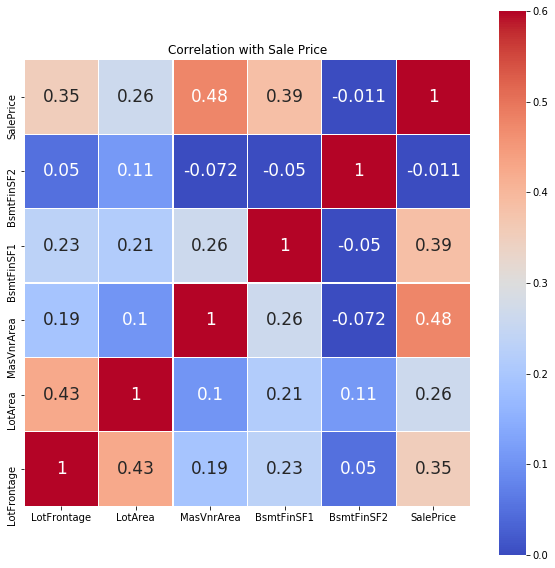

In [98]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=myDF.corr()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(corr, 
                 cmap='coolwarm',
                 vmax=0.6,
                 vmin=0,
                 linewidths=0.1,
                 annot=True,
                 annot_kws={"size": 17}, 
                 square=True);
ax.set_ylim((0,6))

plt.title('Correlation with Sale Price')

#### Between the independent variables, the correlation most worthy of note exists between the lot area and the length of street connected to the property, LotFrontage.

#### Correlation calculations with the target variable show that the best single predictor of house price among the independent variables is masonry veneer area, MasVnrArea.

<a id='Missing_Data_Treatment'></a>
# Missing Data Treatment
We may leave the data as it is or do data imputation to replace them. Suppose the number of cases of missing values is extremely small; then we may drop or omit those values from the analysis. In statistical language, if the number of the cases is less than 5% of the sample, then we can drop them.

If there is a larger number of missing values, then it is better to drop those cases (rather than do imputation) and replace them.

# Handling Missing Values in Numerical Columns

In [99]:
data_len = features.shape[0]

# check what is percentage of missing values in dataframe
for col in features.columns.values:
    missing_values = features[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 260 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        features = features.drop(col, axis = 1)
    # if there are fewer than 260 missing values than fill in with median value of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        features = features.fillna(features[col].median())

In [100]:
for column in features.columns.values:
    print(features[column].isnull().sum())

0
0
0
0
0


#### No more missing values!